### 1. Fitness Representation

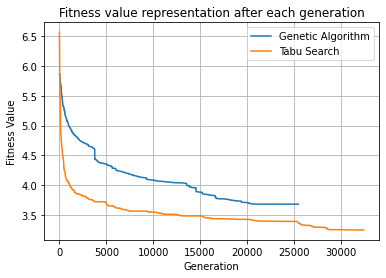

In [25]:
import matplotlib.pyplot as plt

# Read data from files
genetic_data = []
tabu_search_data = []

with open('data/bestSolution/GA/FitnessSolutionGA.txt', 'r') as file:
    genetic_data = [float(line.strip()) for line in file]

with open('data/bestSolution/Tabu/FitnessSolutionTabu.txt', 'r') as file:
    tabu_search_data = [float(line.strip()) for line in file]

# Plot the data
plt.plot(genetic_data, label='Genetic Algorithm')
plt.plot(tabu_search_data, label='Tabu Search')

plt.title('Fitness value representation after each generation')
plt.xlabel('Generation')
plt.ylabel('Fitness Value')
plt.grid(True)
plt.legend()
plt.show()


### 2. Plot Objective 1: With each student have more than one exam, all exams must be evenly spaced

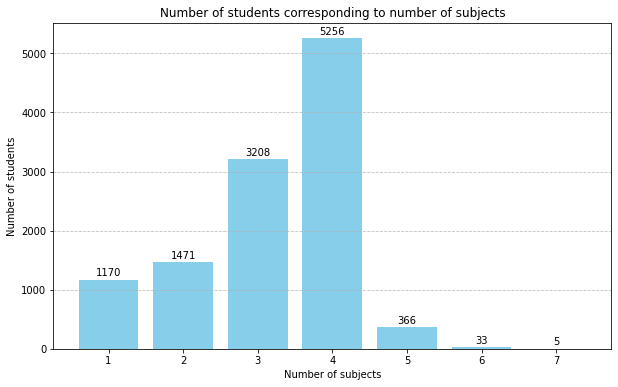

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

student_take_subject = pd.read_csv("data/StudentSubject.csv", header=None).values

subject_counts = {}
for row in student_take_subject:
    number_of_subject = sum(row)
    if number_of_subject not in subject_counts:
        subject_counts[number_of_subject] = 1
    else:
        subject_counts[number_of_subject] += 1

plt.figure(figsize=(10, 6))  # Set the figure size to 10x6 inches
plt.bar(subject_counts.keys(), subject_counts.values(), color='skyblue')
plt.title('Number of students corresponding to number of subjects')
plt.xlabel('Number of subjects')
plt.ylabel('Number of students')
plt.grid(axis='y', linestyle='--', alpha=0.8)

# Annotate each bar with its corresponding count
for subject_count, student_count in subject_counts.items():
    plt.text(subject_count, student_count + 65, str(student_count), ha='center')

plt.show()


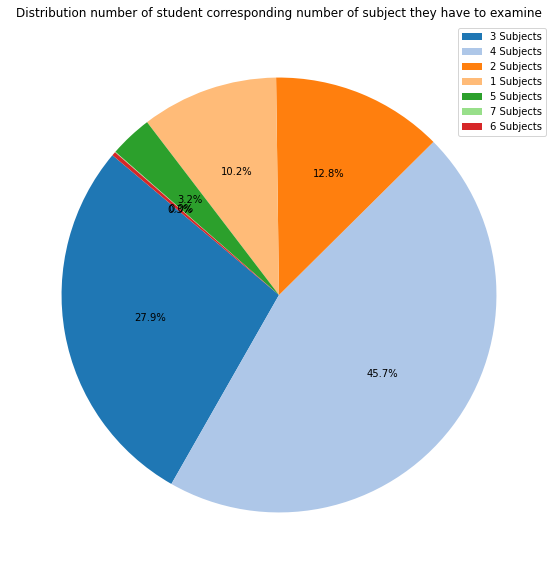

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp CSV
student_take_subject = pd.read_csv("data/StudentSubject.csv", header=None).values

# Tính toán số lượng sinh viên theo số môn học
subject_counts = {}
for row in student_take_subject:
    number_of_subject = sum(row)
    if number_of_subject not in subject_counts:
        subject_counts[number_of_subject] = 1
    else:
        subject_counts[number_of_subject] += 1

# Tạo biểu đồ tròn
plt.figure(figsize=(10, 10))  # Kích thước biểu đồ 8x8 inches

# Tạo biểu đồ tròn với các giá trị và nhãn từ subject_counts
pie = plt.pie(subject_counts.values(), autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)

label = []
# Tạo chuỗi nhãn cho từng màu
for subject in subject_counts.keys():
    label.append(f'{subject} Subjects')

# Thêm nhãn cho từng màu
plt.legend(pie[0], label, loc="best")

plt.title('Distribution number of student corresponding number of subject they have to examine')

plt.show()


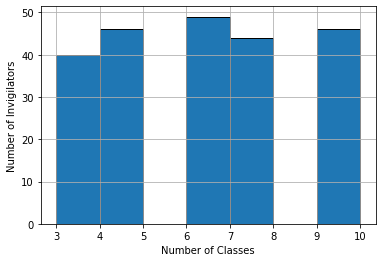

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
data = pd.read_csv("data/Invigilator.csv")

# Multiply each value in the "NumberOfClass" column by 1.5
class_numbers = data["NumberOfClass"] * 1.5

# Plot histogram
plt.hist(class_numbers, bins=range(int(min(class_numbers)), int(max(class_numbers)) + 1, 1), edgecolor='black')
plt.xlabel('Number of Classes')
plt.ylabel('Number of Invigilators')
# plt.title('Histogram of Number of Classes')
plt.grid(True)
plt.show()


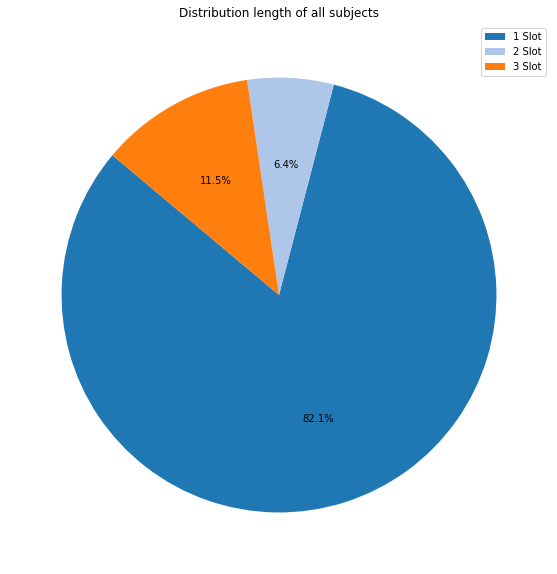

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

subjects = pd.read_csv("data/Subject.csv")
length_of_subject = subjects['ExamDuration'].values / 90  # Chia cho 90 để chuyển đổi đơn vị từ phút sang giờ
length_of_subject_counts = {}
for l in length_of_subject:
    if l not in length_of_subject_counts:
        length_of_subject_counts[l] = 1
    else:
        length_of_subject_counts[l] += 1

# Tạo biểu đồ tròn
plt.figure(figsize=(10, 10))  # Kích thước biểu đồ 8x8 inches

# Tạo biểu đồ tròn với các giá trị và nhãn từ subject_counts
pie = plt.pie(length_of_subject_counts.values(), autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)

label = []
# Tạo chuỗi nhãn cho từng màu
for length in length_of_subject_counts.keys():
    label.append(f'{int(length)} Slot')

# Thêm nhãn cho từng màu
plt.legend(pie[0], label, loc="best")

plt.title('Distribution length of all subjects')

plt.show()


In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
student_take_subject = pd.read_csv("data/StudentSubject.csv", header=None).values
subjects = pd.read_csv("data/Subject.csv")
length_of_subject = (subjects['ExamDuration'].values)/90
# Read the data from the file
with open("data/output.txt", "r") as file:
    lines = file.readlines()

# Initialize the day_counts array
slot_start_of_subject = np.full((156, 54),-1)

# Iterate through each line in the file
for line in lines:
    subject , slot, invigilator_info = line.strip().split(",")
    subject = int(subject.split()[1])
    # Calculate the day index (0-indexed)
    slot = int(slot.split()[1])
    # Extract the invigilator index
    invigilator_index = int((invigilator_info.strip().split(":")[0]).split(" ")[1])
    # Extract the number of invigilators for this slot
    invigilator_count = int(invigilator_info.strip().split(":")[1]) 
    # Update the day_counts array
    slot_start_of_subject[int(subject), int(slot)] += invigilator_count

# Check if an invigilator is scheduled for at least one slot each day
slot_start_of_subject[:, :] = np.where(slot_start_of_subject[:, :] >= 0, 0, slot_start_of_subject[:, :])
# Create slot_start_of_subject_side
slot_start_of_subject_side = np.argmax(slot_start_of_subject, axis=1)
slot_start_of_student = np.full((student_take_subject.shape[0], student_take_subject.shape[1]),-1)
for m in range(student_take_subject.shape[0]):
    for s in range(student_take_subject.shape[1]):
        if(student_take_subject[m, s]==0):
            slot_start_of_student[m, s] = -1
        else:
            slot_start_of_student[m, s] = (student_take_subject[m, s] * slot_start_of_subject_side[s])+1


In [94]:
list_slot_start = [[] for _ in range(11509)]
for m in range(student_take_subject.shape[0]):
    for s in range(student_take_subject.shape[1]):
        if slot_start_of_student[m, s] > -1:
            list_slot_start[m].append(slot_start_of_student[m, s])

sorted_list_slot_start = [sorted(slot_list) for slot_list in list_slot_start]
unique_tuples = set(tuple(slot_list) for slot_list in sorted_list_slot_start)
unique_lists = [list(slot_tuple) for slot_tuple in unique_tuples]    

In [97]:
# Filter out lists with different lengths
lists_length_1 = [slot_list for slot_list in unique_lists if len(slot_list) == 1]
lists_length_2 = [slot_list for slot_list in unique_lists if len(slot_list) == 2]
lists_length_3 = [slot_list for slot_list in unique_lists if len(slot_list) == 3]
lists_length_4 = [slot_list for slot_list in unique_lists if len(slot_list) == 4]
lists_length_5 = [slot_list for slot_list in unique_lists if len(slot_list) == 5]
lists_length_6 = [slot_list for slot_list in unique_lists if len(slot_list) == 6]
lists_length_7 = [slot_list for slot_list in unique_lists if len(slot_list) == 7]

In [98]:
import matplotlib.pyplot as plt

def plot(all_list, list_slot_start):
    num_sublists = len(all_list)
    fig, axs = plt.subplots(3, 2, figsize=(20, 30))  # Create subplots with 2 columns
    # fig.suptitle("Multiple Plots of TimeTable Of Most Student", fontsize=16)  # Set title for the entire figure

    for i in range(num_sublists):
        list_plot = all_list[i]
        if len(list_plot) > 15:
            length = 5
        else:
            length = len(list_plot)
        
        counts = count_subList(list_plot, list_slot_start)
        sorted_lists = [x for _, x in sorted(zip(counts, list_plot), reverse=True)]
        sorted_count = sorted(counts, reverse=True)
        index = i
        if i%2==0:
            k=0
        else:
            k=1
        i= int(i/2)
        for j, lst in enumerate(sorted_lists[:length]):
            axs[i, k].scatter([j] * len(lst), lst, label=f"List {j+1}, Ns: {sorted_count[j]}")
        print(i,k)
        axs[i, k].set_xlabel("List Index")
        axs[i, k].set_ylabel("Slot Index")
        axs[i, k].set_title(f"Plot of Lists Values - Sublist {index+1}")
        axs[i, k].legend(loc="upper left", bbox_to_anchor=(1, 1))
        axs[i, k].grid(True)
        axs[i, k].set_xticks(range(length))
        axs[i, k].set_xticklabels([f"List {j+1}, Students: {sorted_count[j]}" for j in range(length)])
        axs[i, k].set_yticks(range(1,55))
        
    plt.tight_layout()
    plt.show()

def count_subList(list_plot, merge_list):
    counts = []
    for sub_list in list_plot:
        cnt = 0
        for e_list in merge_list:
            if len(sub_list) == len(e_list):
                flag = True
                for e in sub_list:
                    if e not in e_list:
                        flag = False
                        break
                if flag == True:
                    cnt += 1
        counts.append(cnt)

    return counts

# Assuming all_list and list_slot_start are defined somewhere before


In [99]:
all_list = []
all_list.append(lists_length_2)
all_list.append(lists_length_3)
all_list.append(lists_length_4)
all_list.append(lists_length_5)
all_list.append(lists_length_6)
all_list.append(lists_length_7)

0 0
0 1
1 0
1 1
2 0
2 1


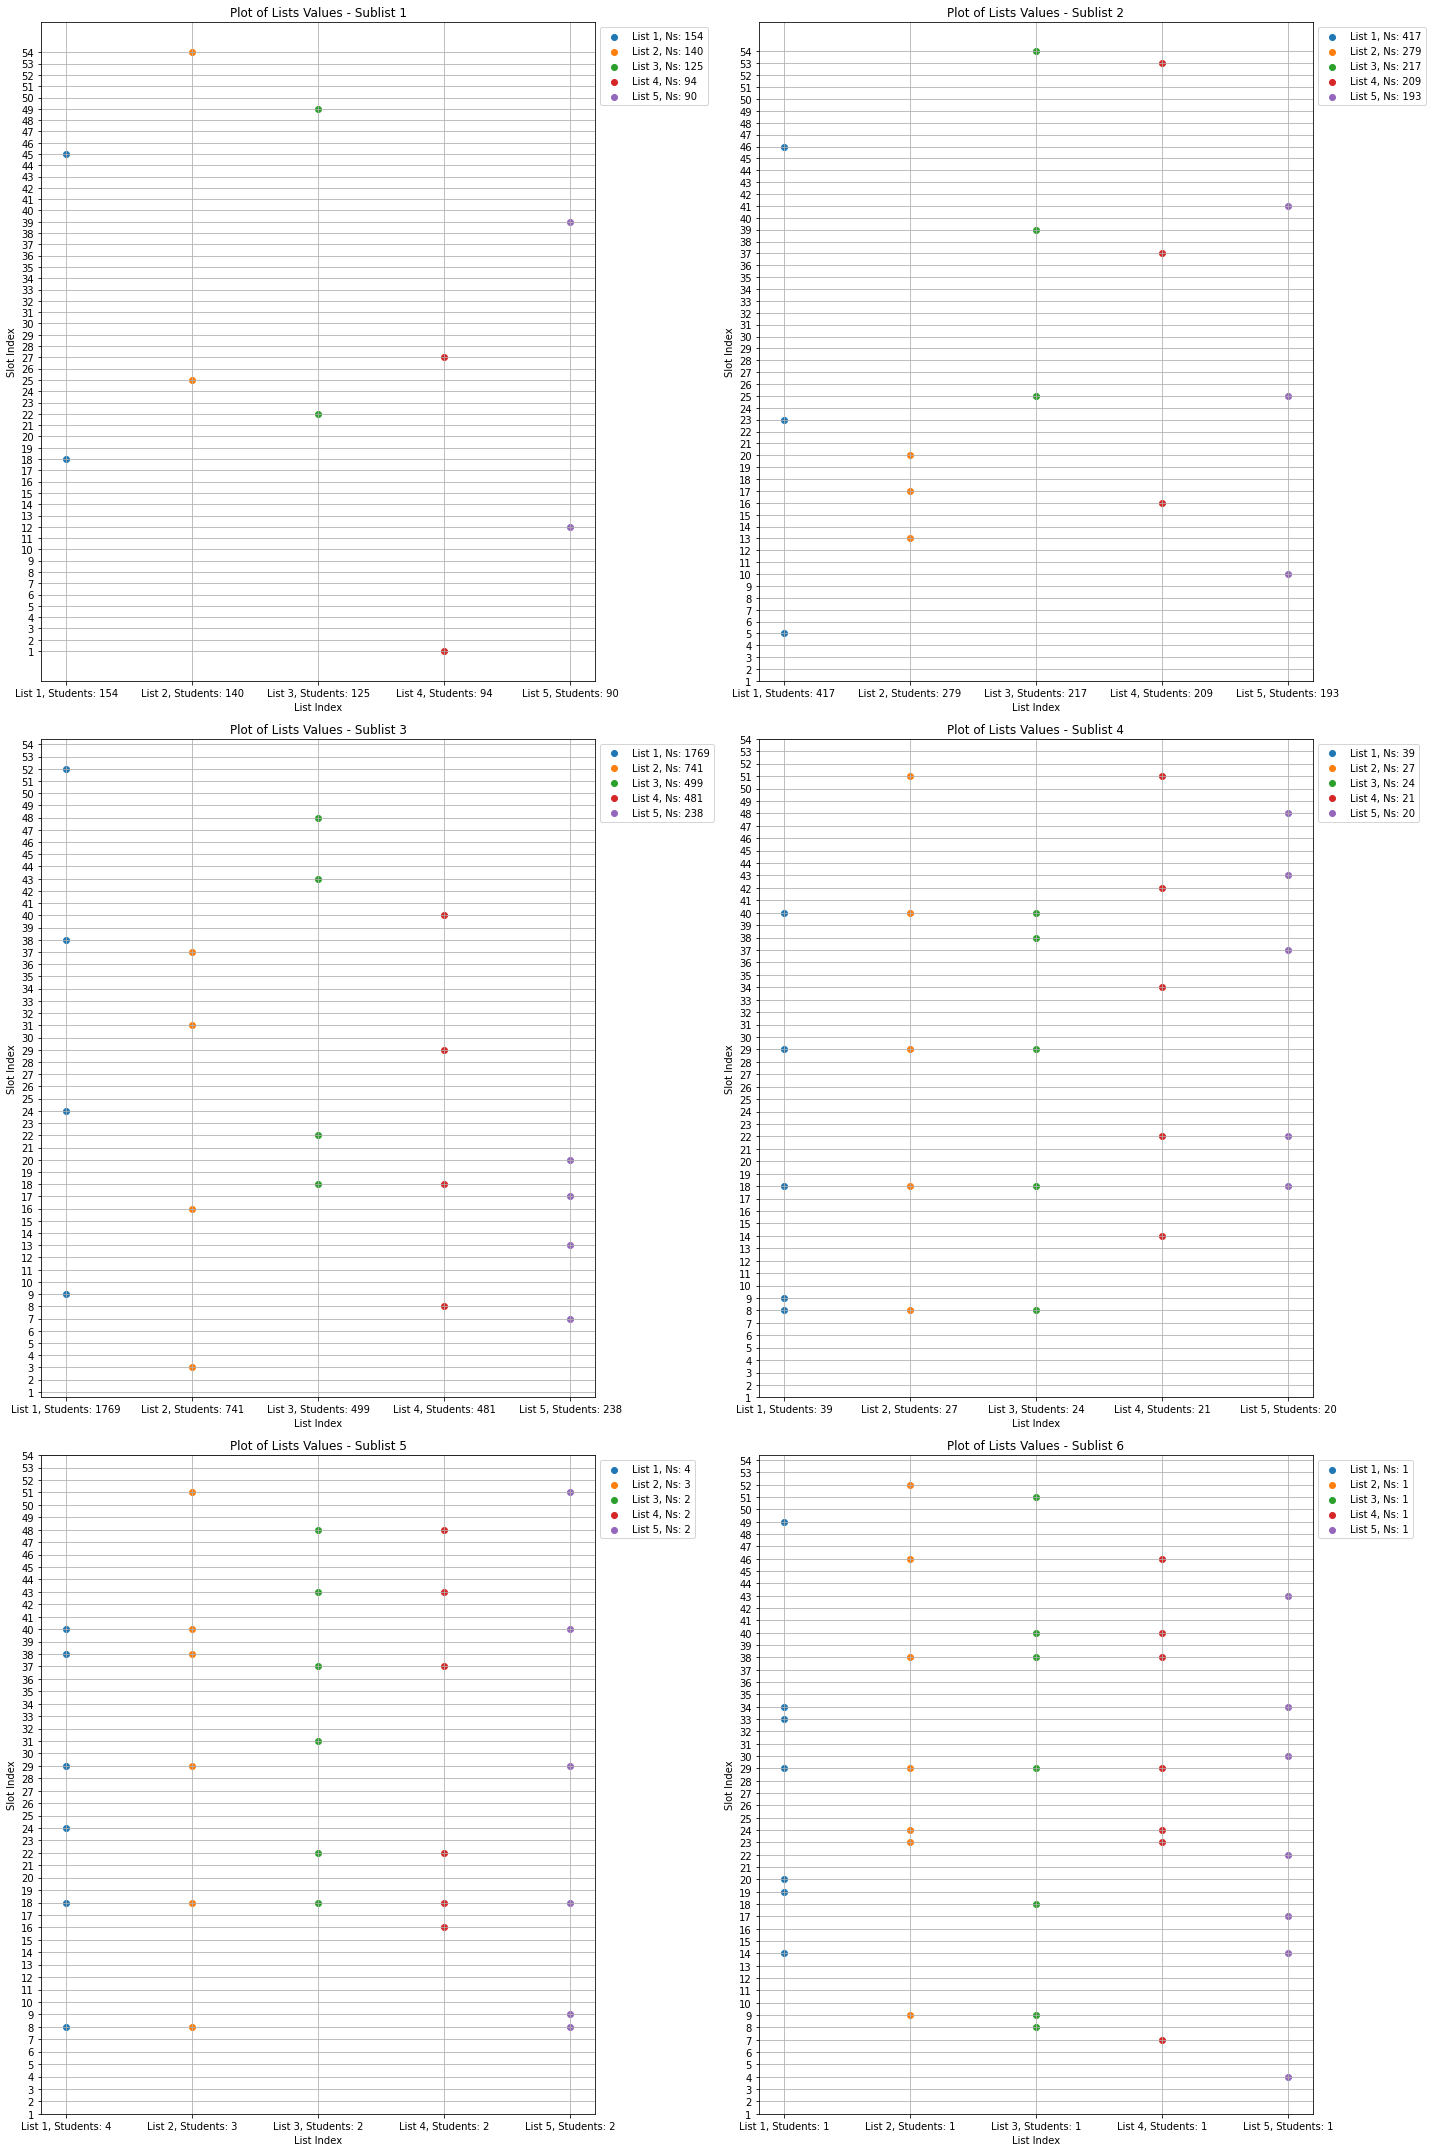

In [100]:
plot(all_list,list_slot_start)

In [104]:
def calculate_distances(sorted_list):
    distances = []
    for i in range(len(sorted_list) - 1):
        distance = sorted_list[i+1] - sorted_list[i]
        distances.append(distance)
    return distances

def calculate_average(lst):
    if not lst:
        return 0  # Trả về 0 nếu danh sách trống
    return sum(lst) / len(lst)
sorted_list_slot_start_length_more_2 = [l for l in sorted_list_slot_start if len(l)>=2]
gap = [calculate_distances(l) for l in sorted_list_slot_start_length_more_2]
# Filter out lists with different lengths
lists_length_1 = [slot_list for slot_list in gap if len(slot_list) == 1]
lists_length_2 = [slot_list for slot_list in gap if len(slot_list) == 2]
lists_length_3 = [slot_list for slot_list in gap if len(slot_list) == 3]
lists_length_4 = [slot_list for slot_list in gap if len(slot_list) == 4]
lists_length_5 = [slot_list for slot_list in gap if len(slot_list) == 5]
lists_length_6 = [slot_list for slot_list in gap if len(slot_list) == 6]

def calculate_distribution(data, label):
    for l in data:
        for i in range(len(l)):
            if l[i] > label:
                l[i] = (label - l[i] % label) / label
            else:
                l[i] = l[i] / label
    new_data = [calculate_average(l)*100 for l in data]
    return new_data

l1 = calculate_distribution(lists_length_1, 27.0)
l2 = calculate_distribution(lists_length_2, 18.0)
l3 = calculate_distribution(lists_length_3, 13.0)
l4 = calculate_distribution(lists_length_4, 10.0)
l5 = calculate_distribution(lists_length_5, 9.0)
l6 = calculate_distribution(lists_length_6, 7.0)
all = l1+l2+l3+l4+l5+l6
data_each = []
data_each.append(calculate_average(l1))
data_each.append(calculate_average(l2))
data_each.append(calculate_average(l3))
data_each.append(calculate_average(l4))
data_each.append(calculate_average(l5))
data_each.append(calculate_average(l6))

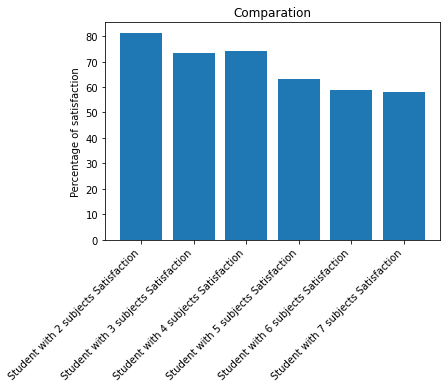

In [135]:
import numpy as np
import matplotlib.pyplot as plt


labels = ['Student with 2 subjects Satisfaction', 'Student with 3 subjects Satisfaction', 'Student with 4 subjects Satisfaction','Student with 5 subjects Satisfaction','Student with 6 subjects Satisfaction','Student with 7 subjects Satisfaction']

# Chỉ số của các cột
x = np.arange(len(labels))

# Vẽ biểu đồ
plt.bar(x, data_each)
plt.ylabel('Percentage of satisfaction')
plt.title('Comparation')

# Đặt tên cho các cột
plt.xticks(x, labels)

# Xoay nhãn trục x chéo
plt.gca().set_xticklabels(labels, rotation=45, ha='right')

# Hiển thị biểu đồ
plt.show()


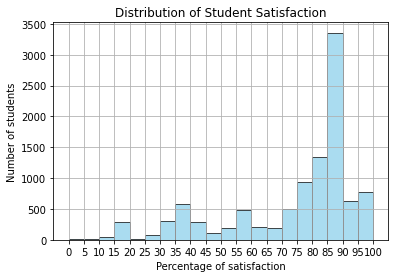

In [107]:
import numpy as np
import matplotlib.pyplot as plt

def plot_student_satisfaction(data):
    # Creating histogram
    counts, bins, _ = plt.hist(data, bins=20, range=(0,100), color='skyblue', edgecolor='black', alpha=0.7)

    plt.title('Distribution of Student Satisfaction')
    plt.xlabel('Percentage of satisfaction')
    plt.ylabel('Number of students')
    plt.xticks(np.arange(0, 101, 5))  # Đặt vị trí của các ticks trên trục x
    plt.grid(True)

    # Đếm số lượng phần tử trong mỗi bin và thêm nó vào biểu đồ
    # for i, count in enumerate(counts):
    #     plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, count, str(int(count)), ha='center', va='bottom')

    plt.show()

# Ví dụ sử dụng
plot_student_satisfaction(all)


Mean: 74.62927406031189
Standard Deviation: 21.6830648556565


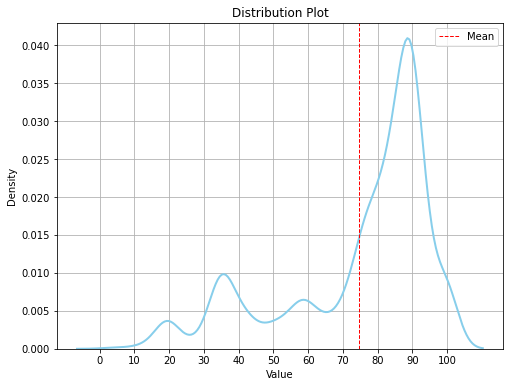

In [108]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



mean = np.mean(all)
std_dev = np.std(all)

print("Mean:", mean)
print("Standard Deviation:", std_dev)

# Vẽ biểu đồ phân phối đường cong
plt.figure(figsize=(8, 6))
sns.kdeplot(all, color='skyblue', linewidth=2)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')

plt.xlabel('Value')
plt.ylabel('Density')
plt.xticks(np.arange(0, 101, 10))  # Đặt vị trí của các ticks trên trục x
plt.title('Distribution Plot')
plt.legend()
plt.grid(True)
plt.show()




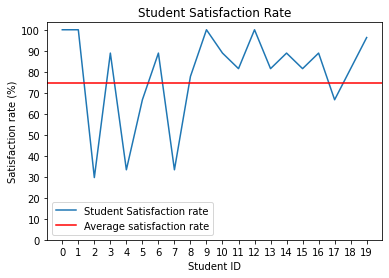

In [109]:
def plot_student_satisfaction1(satisfaction_data):
    # Tính giá trị trung bình
    avg_satisfaction = np.mean(satisfaction_data)
    # Vẽ biểu đồ
    plt.plot(satisfaction_data[:20], label='Student Satisfaction rate')
    plt.axhline(y=avg_satisfaction, color='r', label='Average satisfaction rate')
    plt.xlabel('Student ID')
    plt.ylabel('Satisfaction rate (%)')
    plt.xticks(np.arange(0, len(satisfaction_data[:20]), 1))  # Đặt vị trí của các ticks trên trục x
    plt.yticks(np.arange(0, 101, 10))  # Đặt vị trí của các ticks trên trục x
    plt.title('Student Satisfaction Rate')
    plt.legend()
    plt.show()

# Vẽ biểu đồ
plot_student_satisfaction1(all)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


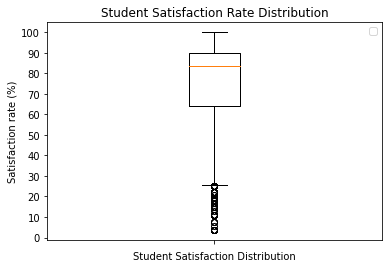

In [110]:
import numpy as np
import matplotlib.pyplot as plt

def plot_student_satisfaction2(satisfaction_data):
    # Tính giá trị trung bình
    avg_satisfaction = np.mean(satisfaction_data)
    # Vẽ biểu đồ
    plt.boxplot(satisfaction_data, labels=['Student Satisfaction rate'])
    # plt.axhline(y=avg_satisfaction, color='r', label='Average satisfaction rate')
    plt.xlabel('Student Satisfaction Distribution')
    plt.ylabel('Satisfaction rate (%)')
    plt.xticks(np.arange(1, 2), [''])  # Đặt vị trí của các ticks trên trục x và ẩn nó
    plt.yticks(np.arange(0, 101, 10))  # Đặt vị trí của các ticks trên trục y
    plt.title('Student Satisfaction Rate Distribution')
    plt.legend()
    plt.show()

# Example data

# Vẽ biểu đồ
plot_student_satisfaction2(all)


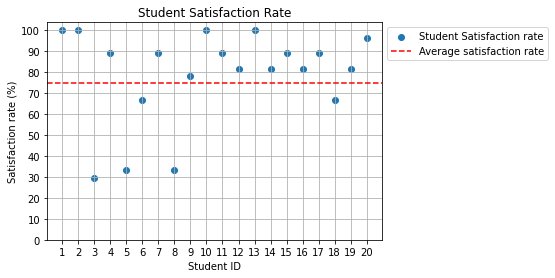

In [111]:
import numpy as np
import matplotlib.pyplot as plt

def plot_student_satisfaction3(satisfaction_data):
    # Tính giá trị trung bình
    avg_satisfaction = np.mean(satisfaction_data)
    
    # Tạo danh sách ID sinh viên
    student_ids = range(1, len(satisfaction_data) + 1)
    
    # Vẽ biểu đồ
    plt.scatter(student_ids[:20], satisfaction_data[:20], label='Student Satisfaction rate')
    plt.axhline(y=avg_satisfaction, color='r', linestyle='--', label='Average satisfaction rate')
    plt.xlabel('Student ID')
    plt.ylabel('Satisfaction rate (%)')
    plt.xticks(np.arange(1, 21, 1))  # Đặt vị trí của các ticks trên trục x
    plt.yticks(np.arange(0, 101, 10))  # Đặt vị trí của các ticks trên trục y
    plt.title('Student Satisfaction Rate')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Đặt vị trí của legend bên ngoài và cố định nó ở phía bên phải giữa
    plt.grid(True)  # Thêm lưới
    plt.show()

# Example dat
# Vẽ biểu đồ
plot_student_satisfaction3(all)


#### 3.1. Number of day go to university for each invigilator

In [112]:
invigilators = pd.read_csv("data/Invigilator.csv")
number_of_slots_required_for_invigilators = np.ceil(1.5*invigilators['NumberOfClass'].values)
for i in range(len(number_of_slots_required_for_invigilators)):
    if number_of_slots_required_for_invigilators[i]%6==0:
        number_of_slots_required_for_invigilators[i] = number_of_slots_required_for_invigilators[i]/6
    else:
        number_of_slots_required_for_invigilators[i] = int(number_of_slots_required_for_invigilators[i]/6)+1

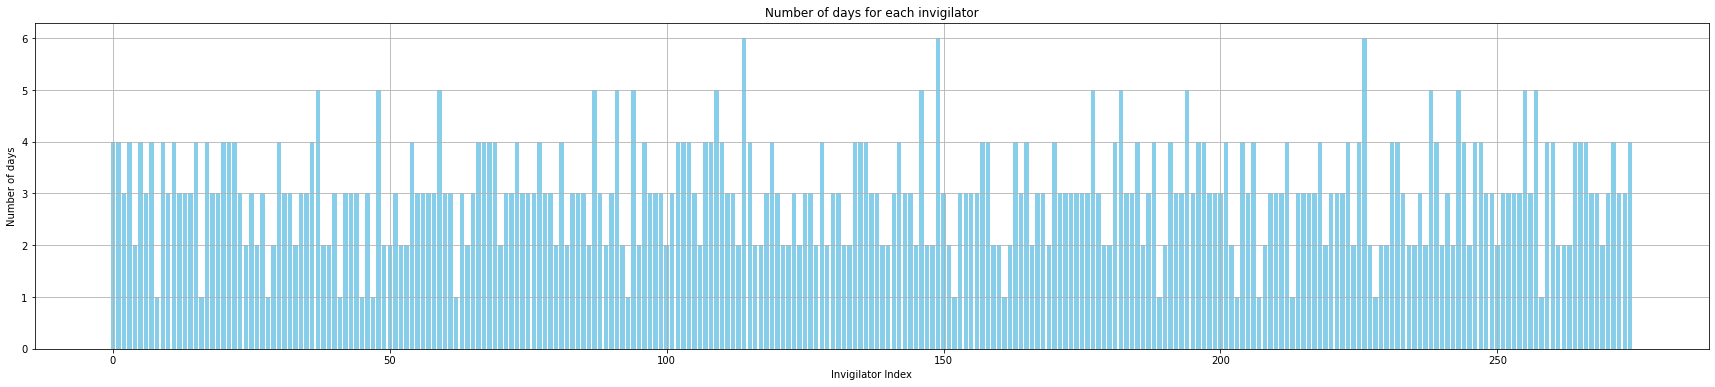

In [113]:
import matplotlib.pyplot as plt
import numpy as np

# Read the data from the file
with open("data/output.txt", "r") as file:
    lines = file.readlines()

# Initialize the day_counts array
day_counts = np.zeros((275, 9))

# Iterate through each line in the file
for line in lines:
    _, slot, invigilator_info = line.strip().split(",")
    # Calculate the day index (0-indexed)
    day = int(slot.split()[1]) /9
    # Extract the invigilator index
    invigilator_index = int((invigilator_info.strip().split(":")[0]).split(" ")[1])
    # Extract the number of invigilators for this slot
    invigilator_count = int(invigilator_info.strip().split(":")[1]) 
    # Update the day_counts array
    day_counts[int(invigilator_index), int(day)] += invigilator_count

# Check if an invigilator is scheduled for at least one slot each day
day_counts[:, :] = np.where(day_counts[:, :] >= 1, 1, day_counts[:, :])
day_counts = np.sum(day_counts, axis=1)
# Plotting
plt.figure(figsize=(30, 6))
plt.bar(range(len(day_counts)), day_counts, color='skyblue')
plt.title('Number of days for each invigilator')
plt.xlabel('Invigilator Index')
plt.ylabel('Number of days')
plt.grid(True)
plt.show()

In [114]:
import numpy as np
import matplotlib.pyplot as plt

def plot_teacher_satisfaction(data):
    # Creating histogram
    counts, bins, _ = plt.hist(data, bins=10, range=(0,100), color='skyblue', edgecolor='black', alpha=0.7)

    plt.title('Distribution of Invigilator Satisfaction')
    plt.xlabel('Percentage of satisfaction')
    plt.ylabel('Number of invigilator')
    plt.xticks(np.arange(0, 101, 10))  # Đặt vị trí của các ticks trên trục x
    plt.grid(True)

    # Đếm số lượng phần tử trong mỗi bin và thêm nó vào biểu đồ
    for i, count in enumerate(counts):
        plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, count, str(int(count)), ha='center', va='bottom')

    plt.show()




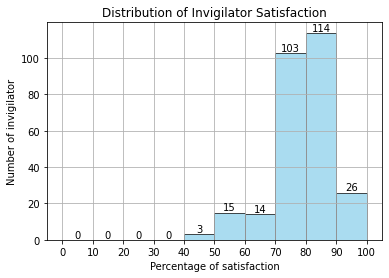

In [115]:
relax_day_max = [9.0 - e for e  in number_of_slots_required_for_invigilators]
day_relax_after_schedule = [9.0 - e for e in day_counts]
invigilator_satisfaction_1 = [max((real/expect)*100,0) for real, expect in zip(day_relax_after_schedule, relax_day_max)]
plot_teacher_satisfaction(invigilator_satisfaction_1)

#### 3.2. the standard deviation with the number of date required and scheduled

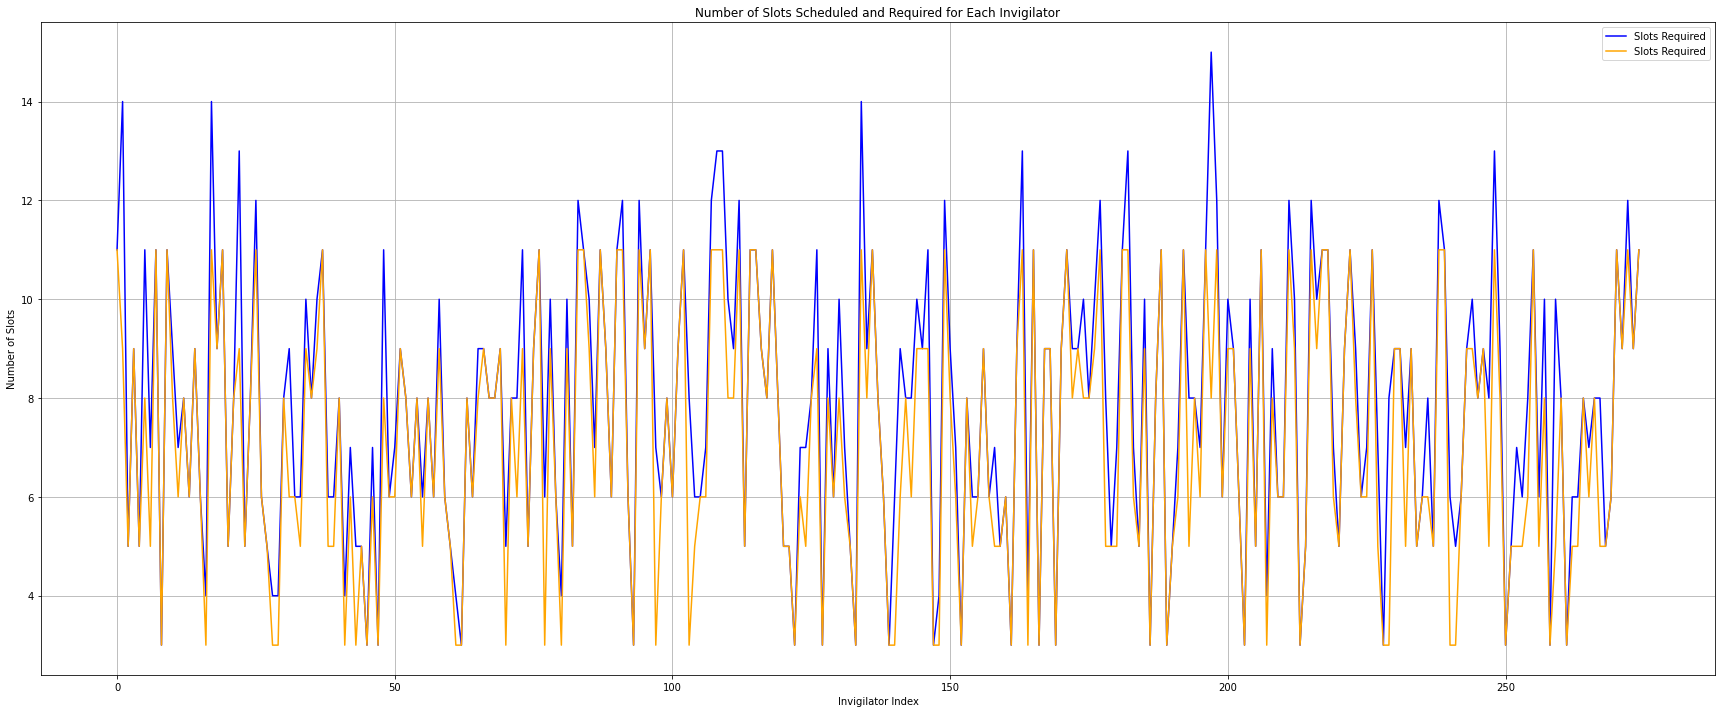

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
invigilators = pd.read_csv("data/Invigilator.csv")
number_of_slots_required_for_invigilators = list(np.ceil(1.5*invigilators['NumberOfClass'].values))
number_of_slots_scheduled_for_invigilators = [0]*275

with open("data/output.txt", "r") as file:
    lines = file.readlines()

for line in lines:
    _, _, invigilator_info = line.strip().split(",")
    invigilator_index= int((invigilator_info.strip().split(":")[0]).split(" ")[1])
    invigilator_count = int(invigilator_info.strip().split(":")[1]) 
    number_of_slots_scheduled_for_invigilators[invigilator_index] += invigilator_count

# Plotting
plt.figure(figsize=(30, 12))  # Set figure size

# Plot number of slots scheduled for each invigilator
plt.plot(range(len(number_of_slots_scheduled_for_invigilators)), number_of_slots_scheduled_for_invigilators, 
         color='blue', linestyle='-', label='Slots Required')
# Plot number of slots required for each invigilator
plt.plot(range(len(number_of_slots_required_for_invigilators)), number_of_slots_required_for_invigilators, 
         color='orange', linestyle='-', label='Slots Required')

plt.title('Number of Slots Scheduled and Required for Each Invigilator')
plt.xlabel('Invigilator Index')
plt.ylabel('Number of Slots')
plt.legend()
plt.grid(True)
plt.show()

In [118]:
import math# Calculate the difference between scheduled and required slots for each invigilator
invi_satisfaction_2 = [max((1-math.fabs(scheduled - required)/required),0)*100 for scheduled, required in zip(number_of_slots_scheduled_for_invigilators, number_of_slots_required_for_invigilators)]


### 4. Plot Objective 3: The standard deviation between the number of room between all slot must be minimum

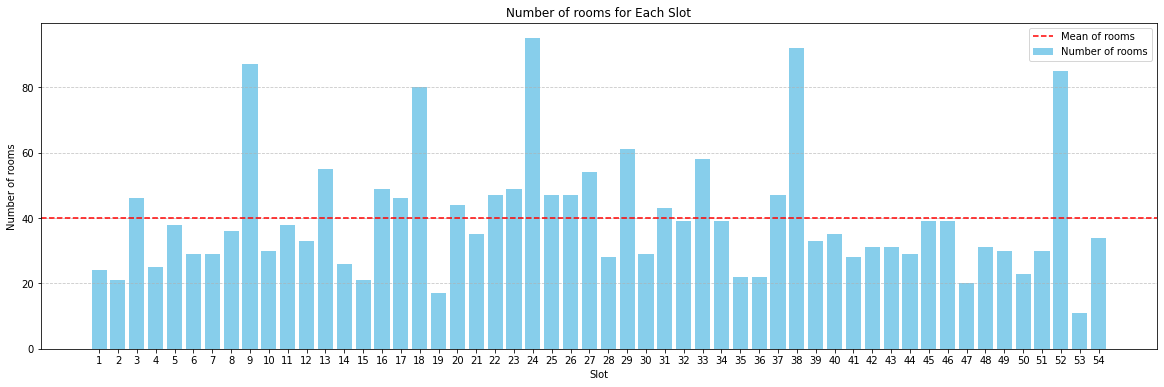

In [119]:
import matplotlib.pyplot as plt

with open("data/output.txt", "r") as file:
    lines = file.readlines()

invigilator_counts = [0] * 54

for line in lines:
    _, slot, invigilator_info = line.strip().split(",")
    slot = int(slot.split()[1])
    invigilator_count = int(invigilator_info.strip().split(":")[1])
    invigilator_counts[slot] += invigilator_count

# Tính giá trị trung bình
mean_value = sum(invigilator_counts) / len(invigilator_counts)

plt.figure(figsize=(20, 6))
slots = range(1, 55)
plt.bar(slots, invigilator_counts, color='skyblue', label='Number of rooms')
plt.axhline(y=mean_value, color='red', linestyle='--', label='Mean of rooms')  # Thêm đường thẳng trung bình
plt.title('Number of rooms for Each Slot')
plt.xlabel('Slot')
plt.ylabel('Number of rooms')
plt.xticks(slots)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


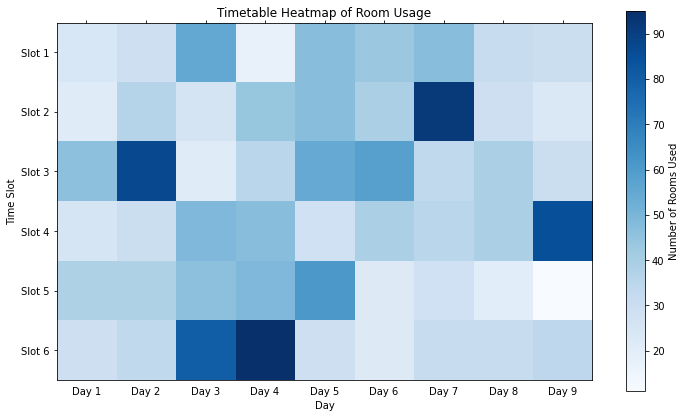

In [120]:
import matplotlib.pyplot as plt
import numpy as np


# Reshaping the data to a 9 days x 6 slots format
data_matrix = np.array(invigilator_counts).reshape((9, 6)).T  # 9 days and 6 slots

# Creating the heatmap
plt.figure(figsize=(12, 7))
plt.imshow(data_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar(label='Number of Rooms Used')
plt.title('Timetable Heatmap of Room Usage')
plt.xlabel('Day')
plt.ylabel('Time Slot')

# Moving the day labels to the top and hiding the bottom labels
plt.tick_params(axis='x', bottom=False, top=True, labelbottom=True, labeltop=False)
plt.xticks(range(9), labels=[f"Day {i+1}" for i in range(9)])
plt.yticks(range(6), labels=[f"Slot {i+1}" for i in range(6)])

plt.show()

In [123]:
mean_value = sum(invigilator_counts) / len(invigilator_counts)
l = [(1-math.fabs(e-mean_value)/60)*100 for e in invigilator_counts]


76.9718792866941

In [124]:
print(f"student satisfaction:{calculate_average(all)}%")
print(f"invigilator satisfaction:{(calculate_average(invigilator_satisfaction_1)+calculate_average(invi_satisfaction_2))/2}%")
print(f"department satisfaction:{calculate_average(l)}%")

student satisfaction:74.62927406031476%
invigilator satisfaction:83.29778958415324%
department satisfaction:76.9718792866941%


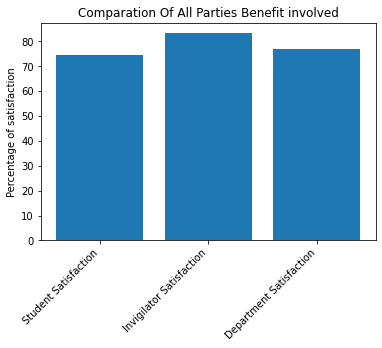

In [126]:
import numpy as np
import matplotlib.pyplot as plt

data = [calculate_average(all),(calculate_average(invigilator_satisfaction_1)+calculate_average(invi_satisfaction_2))/2,calculate_average(l)]

# Tên của các cột
labels = ['Student Satisfaction', 'Invigilator Satisfaction', 'Department Satisfaction']

# Chỉ số của các cột
x = np.arange(len(labels))

# Vẽ biểu đồ
plt.bar(x, data)
plt.ylabel('Percentage of satisfaction')
plt.title('Comparation Of All Parties Benefit involved')

# Đặt tên cho các cột
plt.xticks(x, labels)

# Xoay nhãn trục x chéo
plt.gca().set_xticklabels(labels, rotation=45, ha='right')

# Hiển thị biểu đồ
plt.show()


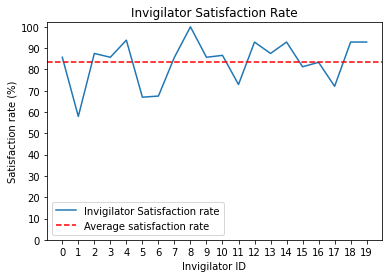

In [127]:
def plot_teacher_satisfaction1(satisfaction_data):
    # Tính giá trị trung bình
    avg_satisfaction = np.mean(satisfaction_data)
    # Vẽ biểu đồ
    plt.plot(satisfaction_data[:20], label='Invigilator Satisfaction rate')
    plt.axhline(y=avg_satisfaction, color='r', linestyle='--', label='Average satisfaction rate')
    plt.xlabel('Invigilator ID')
    plt.ylabel('Satisfaction rate (%)')
    plt.xticks(np.arange(0, len(satisfaction_data[:20]), 1))  # Đặt vị trí của các ticks trên trục x
    plt.yticks(np.arange(0, 101, 10))  # Đặt vị trí của các ticks trên trục x
    plt.title('Invigilator Satisfaction Rate')
    plt.legend()
    plt.show()

# Vẽ biểu đồ
plot_teacher_satisfaction1(satisfaction_data_teacher)

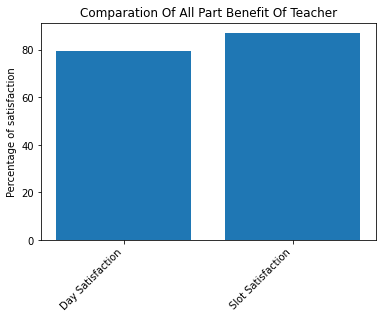

In [139]:
import numpy as np
import matplotlib.pyplot as plt

# Tên của các cột
labels = ['Day Satisfaction', 'Slot Satisfaction']

# Chỉ số của các cột
x = np.arange(len(labels))
data = [calculate_average(invigilator_satisfaction_1), calculate_average(invi_satisfaction_2)]

# Vẽ biểu đồ
plt.bar(x, data)
plt.ylabel('Percentage of satisfaction')
plt.title('Comparation Of All Part Benefit Of Teacher')

# Đặt tên cho các cột
plt.xticks(x, labels)

# Xoay nhãn trục x chéo
plt.gca().set_xticklabels(labels, rotation=45, ha='right')

# Hiển thị biểu đồ
plt.show()


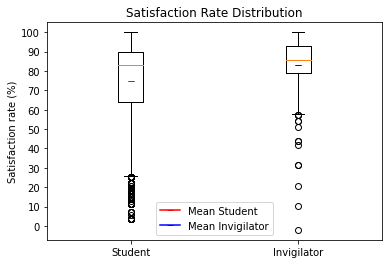

In [128]:
import numpy as np
import matplotlib.pyplot as plt

def plot_satisfaction(student_data, invigilator_data):
    # Vẽ biểu đồ
    plt.boxplot([student_data, invigilator_data], labels=['Student', 'Invigilator'])
    # Tính mean của từng nhóm dữ liệu
    mean_student = np.mean(student_data)
    mean_invigilator = np.mean(invigilator_data)

    # Vẽ đường mean
    plt.plot([1, 1], [mean_student, mean_student], marker='_', color='r', label='Mean Student')
    plt.plot([2, 2], [mean_invigilator, mean_invigilator], marker='_', color='b', label='Mean Invigilator')
    plt.ylabel('Satisfaction rate (%)')
    # Đặt vị trí của các ticks trên trục x
    plt.xticks([1, 2], ['Student', 'Invigilator'])
    plt.yticks(np.arange(0, 101, 10))  # Đặt vị trí của các ticks trên trục y
    plt.title('Satisfaction Rate Distribution')
    plt.legend()
    plt.show()

# Example data

# Vẽ biểu đồ
plot_satisfaction(all, satisfaction_data_teacher)
